In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Monte Carlo Method in Computational Physics

## Random Number Generator
'좋은' 난수 생성기와 '나쁜' 난수 생성기를 비교해 보자. '좋은' 난수 생성기는 `numpy.random`, '나쁜' 난수 생성기는 직접 만든 선형 합동 난수 생성기이다. 좋은걸 만들기 쉬우니까 ~~라이브러리 함수 갖다 쓰면 되니까~~ 그것부터 만들자.

In [2]:
def good_rng(num_pairs):
    rands = (np.random.random_sample((num_pairs,)) * 200).astype(np.int32)
    return (rands[0::2], rands[1::2])
good_rng(10)

(array([175, 138, 161, 118,  61], dtype=int32),
 array([148,   2,  32, 105, 179], dtype=int32))

'나쁜' 난수 생성기도 만들어 보자. 간단한 선형 합동 난수 생성기이다.

In [3]:
def bad_rng(num_pairs):
    seed = 1
    a = 91
    c = 57
    mod = 200
    rands = [seed]
    for _ in range(num_pairs - 1):
        rands.append((a * rands[-1] + c) % mod)
    rands = np.array(rands, dtype=np.int32)
    return (rands[0::2], rands[1::2])
bad_rng(10)

(array([  1, 125, 169, 133,  17], dtype=int32),
 array([148,  32,  36, 160,   4], dtype=int32))

이제 한변 생성된 난수를 시각화해 보자.

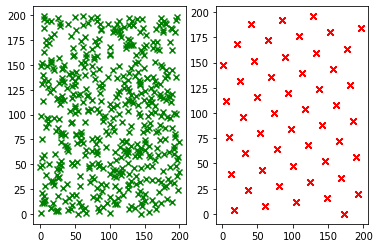

In [4]:
plt.subplot(1, 2, 1)
good_X, good_Y = good_rng(1000)
plt.scatter(good_X, good_Y, c='green', marker='x')
plt.subplot(1, 2, 2)
bad_X, bad_Y = bad_rng(1000)
plt.scatter(bad_X, bad_Y, c='red', marker='x')
plt.show()

scatter plot에서 볼 수 있듯, '나쁜' 난수 생성기에는 일정한 규칙이 있어 난수라고 하기 어렵다는 문제가 있다.